In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import xgboost as xgb

STATE = 26

In [98]:
sns.set(style="darkgrid")

## Decision Tree Classifier

In [108]:
Xtrain = pd.read_csv('Xtrain_treeBased_not_normalized.csv')
Xtest = pd.read_csv('Xtest_treeBased_not_normalized.csv')
ytrain = pd.read_csv('ytrain_treeBased_not_normalized.csv')
ytest = pd.read_csv('ytest_treeBased_not_normalized.csv')

In [32]:
dtree = DecisionTreeClassifier()

dtree_gs_params = {'max_depth':list(range(50, 200, 25)), 'min_samples_leaf':list(range(40,500,10)), 
          'max_leaf_nodes':list(range(50,500,10))}

dtree_gsearch = GridSearchCV(dtree, param_grid=dtree_gs_params)
dtree_gsearch.fit(Xtrain, ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [50, 75, 100, 125, 150, 175],
                         'max_leaf_nodes': [50, 60, 70, 80, 90, 100, 110, 120,
                                            130, 140, 150, 160, 170, 180, 190,
                                            200, 210, 220, 230, 240, 250, 260,
                                            270, 280, 290, 300, 310, 320, 330,
                                            340, ...],
                         'min_samples_leaf': [40, 50, 60, 70, 80, 90, 100, 110,
                                              120, 130, 140, 150, 160, 170, 180,
                                              190, 200, 210, 220, 230, 240, 250,
                                              260, 270, 280, 290, 300, 310, 320,
                                              330, ...]})

In [33]:
dtree_gsearch.best_params_

{'max_depth': 50, 'max_leaf_nodes': 70, 'min_samples_leaf': 40}

In [110]:
best_dtree = DecisionTreeClassifier(max_depth=50, max_leaf_nodes=70, min_samples_leaf=40)
best_dtree.fit(Xtrain, ytrain)
best_dtree.score(Xtest, ytest)

0.85125

In [111]:
dtree_pred = best_dtree.predict(Xtest)
print(classification_report(ytest, dtree_pred))
print(confusion_matrix(ytest, dtree_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       400
           1       0.83      0.88      0.86       400

    accuracy                           0.85       800
   macro avg       0.85      0.85      0.85       800
weighted avg       0.85      0.85      0.85       800

[[329  71]
 [ 48 352]]


In [112]:
dtreef, dtreet, _ = roc_curve(y_score=dtree_pred, y_true=ytest)
dtreeauc = roc_auc_score(dtree_pred, ytest)

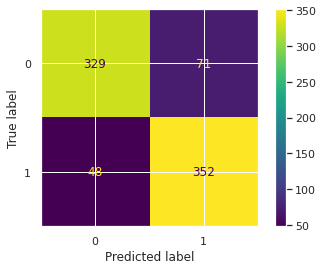

In [41]:


cm = confusion_matrix(ytest, dtree_pred, labels = best_dtree.classes_) # your confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Random Forest

In [44]:
rf_n_estimators = list(range(50, 300, 20))
rf_max_depth = list(range(50, 200, 20))
rf_min_samples_leaf = list(range(50,300, 20))


rf_random_params = {'n_estimators': rf_n_estimators,
                    'max_depth': rf_max_depth,
                    'min_samples_leaf': rf_min_samples_leaf}

rf = RandomForestClassifier()

rf_random_gsearch = GridSearchCV(rf, rf_random_params, verbose=3,
                               n_jobs=-1)

rf_random_gsearch.fit(Xtrain, ytrain)

rf_random_gsearch.best_estimator_

Fitting 5 folds for each of 1352 candidates, totalling 6760 fits


/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 4/5] END max_depth=50, min_samples_leaf=50, n_estimators=50;, score=0.850 total time=   0.3s
[CV 4/5] END max_depth=50, min_samples_leaf=50, n_estimators=190;, score=0.850 total time=   1.2s
[CV 2/5] END max_depth=50, min_samples_leaf=50, n_estimators=290;, score=0.842 total time=   2.7s
[CV 4/5] END max_depth=50, min_samples_leaf=70, n_estimators=290;, score=0.846 total time=   2.1s
[CV 1/5] END max_depth=50, min_samples_leaf=90, n_estimators=290;, score=0.863 total time=   2.7s
[CV 2/5] END max_depth=50, min_samples_leaf=130, n_estimators=90;, score=0.835 total time=   0.8s
[CV 1/5] END max_depth=50, min_samples_leaf=130, n_estimators=210;, score=0.858 total time=   2.2s
[CV 4/5] END max_depth=50, min_samples_leaf=150, n_estimators=170;, score=0.828 total time=   2.0s
[CV 5/5] END max_depth=50, min_samples_leaf=170, n_estimators=150;, score=0.835 total time=   1.4s
[CV 2/5] END max_depth=50, min_samples_leaf=190, n_estimators=90;, score=0.836 total time=   0.5s
[CV 3/5] END max_d

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 2/5] END max_depth=50, min_samples_leaf=50, n_estimators=90;, score=0.846 total time=   0.6s
[CV 4/5] END max_depth=50, min_samples_leaf=50, n_estimators=210;, score=0.851 total time=   1.7s
[CV 2/5] END max_depth=50, min_samples_leaf=70, n_estimators=130;, score=0.835 total time=   1.6s
[CV 2/5] END max_depth=50, min_samples_leaf=70, n_estimators=270;, score=0.837 total time=   2.2s
[CV 4/5] END max_depth=50, min_samples_leaf=90, n_estimators=270;, score=0.842 total time=   2.2s
[CV 4/5] END max_depth=50, min_samples_leaf=110, n_estimators=290;, score=0.834 total time=   2.9s
[CV 3/5] END max_depth=50, min_samples_leaf=150, n_estimators=90;, score=0.837 total time=   0.4s
[CV 1/5] END max_depth=50, min_samples_leaf=150, n_estimators=150;, score=0.860 total time=   0.7s
[CV 1/5] END max_depth=50, min_samples_leaf=150, n_estimators=230;, score=0.858 total time=   1.2s
[CV 4/5] END max_depth=50, min_samples_leaf=170, n_estimators=110;, score=0.831 total time=   0.8s
[CV 5/5] END max_

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 5/5] END max_depth=50, min_samples_leaf=50, n_estimators=130;, score=0.853 total time=   0.8s
[CV 1/5] END max_depth=50, min_samples_leaf=50, n_estimators=250;, score=0.872 total time=   2.2s
[CV 1/5] END max_depth=50, min_samples_leaf=70, n_estimators=230;, score=0.865 total time=   1.9s
[CV 3/5] END max_depth=50, min_samples_leaf=90, n_estimators=170;, score=0.840 total time=   1.6s
[CV 1/5] END max_depth=50, min_samples_leaf=110, n_estimators=70;, score=0.860 total time=   0.3s
[CV 3/5] END max_depth=50, min_samples_leaf=110, n_estimators=110;, score=0.847 total time=   0.6s
[CV 3/5] END max_depth=50, min_samples_leaf=110, n_estimators=190;, score=0.838 total time=   1.0s
[CV 2/5] END max_depth=50, min_samples_leaf=130, n_estimators=50;, score=0.825 total time=   0.3s
[CV 5/5] END max_depth=50, min_samples_leaf=130, n_estimators=70;, score=0.840 total time=   0.3s
[CV 1/5] END max_depth=50, min_samples_leaf=130, n_estimators=130;, score=0.856 total time=   0.6s
[CV 4/5] END max_

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END max_depth=50, min_samples_leaf=50, n_estimators=170;, score=0.843 total time=   1.4s
[CV 5/5] END max_depth=50, min_samples_leaf=70, n_estimators=90;, score=0.847 total time=   0.5s
[CV 2/5] END max_depth=50, min_samples_leaf=70, n_estimators=150;, score=0.838 total time=   0.9s
[CV 4/5] END max_depth=50, min_samples_leaf=70, n_estimators=230;, score=0.844 total time=   1.2s
[CV 2/5] END max_depth=50, min_samples_leaf=90, n_estimators=90;, score=0.836 total time=   0.6s
[CV 2/5] END max_depth=50, min_samples_leaf=90, n_estimators=190;, score=0.832 total time=   1.6s
[CV 3/5] END max_depth=50, min_samples_leaf=110, n_estimators=90;, score=0.844 total time=   0.7s
[CV 1/5] END max_depth=50, min_samples_leaf=110, n_estimators=190;, score=0.858 total time=   1.2s
[CV 4/5] END max_depth=50, min_samples_leaf=130, n_estimators=50;, score=0.831 total time=   0.4s
[CV 5/5] END max_depth=50, min_samples_leaf=130, n_estimators=90;, score=0.841 total time=   0.6s
[CV 2/5] END max_dept

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 5/5] END max_depth=50, min_samples_leaf=50, n_estimators=50;, score=0.850 total time=   0.3s
[CV 5/5] END max_depth=50, min_samples_leaf=50, n_estimators=190;, score=0.853 total time=   1.3s
[CV 3/5] END max_depth=50, min_samples_leaf=70, n_estimators=50;, score=0.845 total time=   0.4s
[CV 4/5] END max_depth=50, min_samples_leaf=70, n_estimators=70;, score=0.843 total time=   0.6s
[CV 1/5] END max_depth=50, min_samples_leaf=70, n_estimators=150;, score=0.867 total time=   1.3s
[CV 3/5] END max_depth=50, min_samples_leaf=70, n_estimators=270;, score=0.850 total time=   1.5s
[CV 3/5] END max_depth=50, min_samples_leaf=90, n_estimators=190;, score=0.842 total time=   1.0s
[CV 2/5] END max_depth=50, min_samples_leaf=90, n_estimators=290;, score=0.833 total time=   1.6s
[CV 5/5] END max_depth=50, min_samples_leaf=110, n_estimators=210;, score=0.843 total time=   1.2s
[CV 2/5] END max_depth=50, min_samples_leaf=130, n_estimators=110;, score=0.834 total time=   0.6s
[CV 5/5] END max_dept

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 1/5] END max_depth=50, min_samples_leaf=50, n_estimators=50;, score=0.876 total time=   0.3s
[CV 2/5] END max_depth=50, min_samples_leaf=50, n_estimators=190;, score=0.846 total time=   1.3s
[CV 3/5] END max_depth=50, min_samples_leaf=50, n_estimators=290;, score=0.856 total time=   2.3s
[CV 4/5] END max_depth=50, min_samples_leaf=70, n_estimators=250;, score=0.847 total time=   1.3s
[CV 5/5] END max_depth=50, min_samples_leaf=90, n_estimators=150;, score=0.844 total time=   0.8s
[CV 5/5] END max_depth=50, min_samples_leaf=90, n_estimators=250;, score=0.842 total time=   1.3s
[CV 1/5] END max_depth=50, min_samples_leaf=110, n_estimators=150;, score=0.867 total time=   0.8s
[CV 2/5] END max_depth=50, min_samples_leaf=110, n_estimators=250;, score=0.837 total time=   2.5s
[CV 1/5] END max_depth=50, min_samples_leaf=130, n_estimators=290;, score=0.865 total time=   2.8s
[CV 4/5] END max_depth=50, min_samples_leaf=170, n_estimators=70;, score=0.833 total time=   0.3s
[CV 1/5] END max_d

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 5/5] END max_depth=50, min_samples_leaf=50, n_estimators=70;, score=0.849 total time=   0.4s
[CV 2/5] END max_depth=50, min_samples_leaf=50, n_estimators=210;, score=0.839 total time=   1.7s
[CV 1/5] END max_depth=50, min_samples_leaf=70, n_estimators=110;, score=0.866 total time=   0.7s
[CV 1/5] END max_depth=50, min_samples_leaf=70, n_estimators=210;, score=0.872 total time=   1.8s
[CV 3/5] END max_depth=50, min_samples_leaf=90, n_estimators=90;, score=0.840 total time=   0.5s
[CV 5/5] END max_depth=50, min_samples_leaf=90, n_estimators=170;, score=0.845 total time=   1.2s
[CV 5/5] END max_depth=50, min_samples_leaf=90, n_estimators=290;, score=0.847 total time=   1.9s
[CV 3/5] END max_depth=50, min_samples_leaf=110, n_estimators=290;, score=0.845 total time=   2.0s
[CV 5/5] END max_depth=50, min_samples_leaf=130, n_estimators=250;, score=0.843 total time=   2.1s
[CV 3/5] END max_depth=50, min_samples_leaf=150, n_estimators=230;, score=0.831 total time=   1.6s
[CV 1/5] END max_de

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 5/5] END max_depth=50, min_samples_leaf=50, n_estimators=90;, score=0.852 total time=   0.7s
[CV 1/5] END max_depth=50, min_samples_leaf=50, n_estimators=230;, score=0.870 total time=   1.4s
[CV 5/5] END max_depth=50, min_samples_leaf=70, n_estimators=110;, score=0.842 total time=   0.9s
[CV 5/5] END max_depth=50, min_samples_leaf=70, n_estimators=210;, score=0.848 total time=   1.9s
[CV 1/5] END max_depth=50, min_samples_leaf=90, n_estimators=170;, score=0.866 total time=   1.7s
[CV 4/5] END max_depth=50, min_samples_leaf=110, n_estimators=70;, score=0.838 total time=   0.7s
[CV 4/5] END max_depth=50, min_samples_leaf=110, n_estimators=170;, score=0.836 total time=   1.3s
[CV 2/5] END max_depth=50, min_samples_leaf=130, n_estimators=70;, score=0.833 total time=   0.4s
[CV 1/5] END max_depth=50, min_samples_leaf=130, n_estimators=110;, score=0.853 total time=   0.5s
[CV 5/5] END max_depth=50, min_samples_leaf=130, n_estimators=170;, score=0.842 total time=   0.8s
[CV 5/5] END max_d

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 1/5] END max_depth=50, min_samples_leaf=50, n_estimators=190;, score=0.869 total time=   1.4s
[CV 5/5] END max_depth=50, min_samples_leaf=70, n_estimators=70;, score=0.847 total time=   0.4s
[CV 5/5] END max_depth=50, min_samples_leaf=70, n_estimators=130;, score=0.848 total time=   1.1s
[CV 5/5] END max_depth=50, min_samples_leaf=70, n_estimators=230;, score=0.844 total time=   1.3s
[CV 1/5] END max_depth=50, min_samples_leaf=90, n_estimators=110;, score=0.864 total time=   0.7s
[CV 2/5] END max_depth=50, min_samples_leaf=90, n_estimators=210;, score=0.838 total time=   1.6s
[CV 5/5] END max_depth=50, min_samples_leaf=110, n_estimators=110;, score=0.844 total time=   0.6s
[CV 4/5] END max_depth=50, min_samples_leaf=110, n_estimators=190;, score=0.838 total time=   1.5s
[CV 5/5] END max_depth=50, min_samples_leaf=130, n_estimators=110;, score=0.840 total time=   0.5s
[CV 3/5] END max_depth=50, min_samples_leaf=130, n_estimators=190;, score=0.840 total time=   1.0s
[CV 5/5] END max_

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 1/5] END max_depth=50, min_samples_leaf=50, n_estimators=90;, score=0.869 total time=   0.6s
[CV 4/5] END max_depth=50, min_samples_leaf=50, n_estimators=230;, score=0.849 total time=   1.2s
[CV 2/5] END max_depth=50, min_samples_leaf=70, n_estimators=110;, score=0.842 total time=   0.7s
[CV 5/5] END max_depth=50, min_samples_leaf=70, n_estimators=190;, score=0.847 total time=   1.7s
[CV 2/5] END max_depth=50, min_samples_leaf=90, n_estimators=70;, score=0.828 total time=   0.3s
[CV 5/5] END max_depth=50, min_samples_leaf=90, n_estimators=110;, score=0.844 total time=   0.6s
[CV 3/5] END max_depth=50, min_samples_leaf=90, n_estimators=210;, score=0.850 total time=   2.0s
[CV 5/5] END max_depth=50, min_samples_leaf=110, n_estimators=170;, score=0.844 total time=   1.1s
[CV 3/5] END max_depth=50, min_samples_leaf=130, n_estimators=50;, score=0.833 total time=   0.4s
[CV 3/5] END max_depth=50, min_samples_leaf=130, n_estimators=90;, score=0.836 total time=   0.6s
[CV 4/5] END max_dept

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 3/5] END max_depth=50, min_samples_leaf=50, n_estimators=50;, score=0.859 total time=   0.3s
[CV 3/5] END max_depth=50, min_samples_leaf=50, n_estimators=190;, score=0.852 total time=   2.5s
[CV 1/5] END max_depth=50, min_samples_leaf=70, n_estimators=190;, score=0.867 total time=   2.4s
[CV 4/5] END max_depth=50, min_samples_leaf=90, n_estimators=170;, score=0.844 total time=   1.4s
[CV 3/5] END max_depth=50, min_samples_leaf=110, n_estimators=50;, score=0.843 total time=   0.3s
[CV 5/5] END max_depth=50, min_samples_leaf=110, n_estimators=90;, score=0.838 total time=   0.6s
[CV 3/5] END max_depth=50, min_samples_leaf=110, n_estimators=170;, score=0.844 total time=   1.4s
[CV 3/5] END max_depth=50, min_samples_leaf=130, n_estimators=70;, score=0.835 total time=   0.5s
[CV 3/5] END max_depth=50, min_samples_leaf=130, n_estimators=150;, score=0.833 total time=   1.4s
[CV 4/5] END max_depth=50, min_samples_leaf=150, n_estimators=50;, score=0.828 total time=   0.6s
[CV 2/5] END max_de

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 1/5] END max_depth=50, min_samples_leaf=50, n_estimators=170;, score=0.869 total time=   1.4s
[CV 4/5] END max_depth=50, min_samples_leaf=70, n_estimators=110;, score=0.842 total time=   0.6s
[CV 4/5] END max_depth=50, min_samples_leaf=70, n_estimators=190;, score=0.844 total time=   1.2s
[CV 1/5] END max_depth=50, min_samples_leaf=70, n_estimators=290;, score=0.865 total time=   1.7s
[CV 2/5] END max_depth=50, min_samples_leaf=90, n_estimators=250;, score=0.838 total time=   2.0s
[CV 4/5] END max_depth=50, min_samples_leaf=110, n_estimators=210;, score=0.834 total time=   1.0s
[CV 4/5] END max_depth=50, min_samples_leaf=130, n_estimators=70;, score=0.838 total time=   0.3s
[CV 4/5] END max_depth=50, min_samples_leaf=130, n_estimators=110;, score=0.833 total time=   0.9s
[CV 1/5] END max_depth=50, min_samples_leaf=130, n_estimators=250;, score=0.861 total time=   2.9s
[CV 1/5] END max_depth=50, min_samples_leaf=170, n_estimators=50;, score=0.857 total time=   0.6s
[CV 5/5] END max_

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 3/5] END max_depth=50, min_samples_leaf=50, n_estimators=110;, score=0.856 total time=   1.0s
[CV 3/5] END max_depth=50, min_samples_leaf=50, n_estimators=270;, score=0.855 total time=   2.5s
[CV 2/5] END max_depth=50, min_samples_leaf=70, n_estimators=250;, score=0.837 total time=   1.5s
[CV 2/5] END max_depth=50, min_samples_leaf=90, n_estimators=170;, score=0.833 total time=   1.6s
[CV 3/5] END max_depth=50, min_samples_leaf=110, n_estimators=70;, score=0.841 total time=   0.5s
[CV 3/5] END max_depth=50, min_samples_leaf=110, n_estimators=150;, score=0.840 total time=   0.8s
[CV 1/5] END max_depth=50, min_samples_leaf=110, n_estimators=270;, score=0.863 total time=   2.8s
[CV 3/5] END max_depth=50, min_samples_leaf=150, n_estimators=70;, score=0.829 total time=   0.8s
[CV 5/5] END max_depth=50, min_samples_leaf=150, n_estimators=150;, score=0.840 total time=   1.4s
[CV 3/5] END max_depth=50, min_samples_leaf=170, n_estimators=70;, score=0.832 total time=   0.3s
[CV 3/5] END max_

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 4/5] END max_depth=50, min_samples_leaf=50, n_estimators=70;, score=0.854 total time=   0.6s
[CV 5/5] END max_depth=50, min_samples_leaf=50, n_estimators=210;, score=0.852 total time=   1.6s
[CV 3/5] END max_depth=50, min_samples_leaf=70, n_estimators=130;, score=0.847 total time=   1.5s
[CV 1/5] END max_depth=50, min_samples_leaf=70, n_estimators=270;, score=0.867 total time=   2.4s
[CV 5/5] END max_depth=50, min_samples_leaf=90, n_estimators=270;, score=0.851 total time=   2.0s
[CV 5/5] END max_depth=50, min_samples_leaf=110, n_estimators=270;, score=0.842 total time=   2.7s
[CV 5/5] END max_depth=50, min_samples_leaf=150, n_estimators=50;, score=0.839 total time=   0.5s
[CV 5/5] END max_depth=50, min_samples_leaf=150, n_estimators=110;, score=0.838 total time=   0.5s
[CV 3/5] END max_depth=50, min_samples_leaf=150, n_estimators=170;, score=0.840 total time=   1.0s
[CV 1/5] END max_depth=50, min_samples_leaf=150, n_estimators=290;, score=0.853 total time=   2.0s
[CV 3/5] END max_

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 1/5] END max_depth=50, min_samples_leaf=50, n_estimators=70;, score=0.869 total time=   0.8s
[CV 5/5] END max_depth=50, min_samples_leaf=50, n_estimators=230;, score=0.852 total time=   1.8s
[CV 3/5] END max_depth=50, min_samples_leaf=70, n_estimators=190;, score=0.850 total time=   1.8s
[CV 5/5] END max_depth=50, min_samples_leaf=90, n_estimators=70;, score=0.845 total time=   0.5s
[CV 4/5] END max_depth=50, min_samples_leaf=90, n_estimators=150;, score=0.843 total time=   1.4s
[CV 1/5] END max_depth=50, min_samples_leaf=110, n_estimators=50;, score=0.858 total time=   0.3s
[CV 2/5] END max_depth=50, min_samples_leaf=110, n_estimators=70;, score=0.833 total time=   0.4s
[CV 4/5] END max_depth=50, min_samples_leaf=110, n_estimators=130;, score=0.837 total time=   1.0s
[CV 4/5] END max_depth=50, min_samples_leaf=110, n_estimators=270;, score=0.834 total time=   1.7s
[CV 3/5] END max_depth=50, min_samples_leaf=130, n_estimators=230;, score=0.833 total time=   1.7s
[CV 3/5] END max_de

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 5/5] END max_depth=50, min_samples_leaf=50, n_estimators=150;, score=0.852 total time=   1.1s
[CV 5/5] END max_depth=50, min_samples_leaf=70, n_estimators=50;, score=0.844 total time=   0.3s
[CV 3/5] END max_depth=50, min_samples_leaf=70, n_estimators=90;, score=0.841 total time=   0.9s
[CV 4/5] END max_depth=50, min_samples_leaf=70, n_estimators=210;, score=0.844 total time=   1.9s
[CV 3/5] END max_depth=50, min_samples_leaf=90, n_estimators=130;, score=0.843 total time=   0.6s
[CV 1/5] END max_depth=50, min_samples_leaf=90, n_estimators=230;, score=0.863 total time=   1.2s
[CV 2/5] END max_depth=50, min_samples_leaf=110, n_estimators=90;, score=0.833 total time=   1.1s
[CV 5/5] END max_depth=50, min_samples_leaf=110, n_estimators=250;, score=0.840 total time=   2.4s
[CV 4/5] END max_depth=50, min_samples_leaf=130, n_estimators=270;, score=0.840 total time=   1.8s
[CV 3/5] END max_depth=50, min_samples_leaf=150, n_estimators=210;, score=0.838 total time=   1.5s
[CV 1/5] END max_de

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 2/5] END max_depth=50, min_samples_leaf=50, n_estimators=50;, score=0.847 total time=   0.4s
[CV 1/5] END max_depth=50, min_samples_leaf=50, n_estimators=210;, score=0.869 total time=   1.7s
[CV 2/5] END max_depth=50, min_samples_leaf=70, n_estimators=90;, score=0.839 total time=   0.7s
[CV 4/5] END max_depth=50, min_samples_leaf=70, n_estimators=170;, score=0.844 total time=   2.2s
[CV 2/5] END max_depth=50, min_samples_leaf=90, n_estimators=130;, score=0.836 total time=   0.7s
[CV 2/5] END max_depth=50, min_samples_leaf=90, n_estimators=230;, score=0.833 total time=   1.7s
[CV 4/5] END max_depth=50, min_samples_leaf=110, n_estimators=150;, score=0.835 total time=   0.9s
[CV 3/5] END max_depth=50, min_samples_leaf=110, n_estimators=270;, score=0.842 total time=   1.5s
[CV 2/5] END max_depth=50, min_samples_leaf=130, n_estimators=210;, score=0.833 total time=   3.1s
[CV 2/5] END max_depth=50, min_samples_leaf=150, n_estimators=270;, score=0.833 total time=   1.6s
[CV 1/5] END max_d

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 4/5] END max_depth=50, min_samples_leaf=50, n_estimators=90;, score=0.853 total time=   0.8s
[CV 3/5] END max_depth=50, min_samples_leaf=50, n_estimators=230;, score=0.856 total time=   1.4s
[CV 4/5] END max_depth=50, min_samples_leaf=70, n_estimators=130;, score=0.844 total time=   0.7s
[CV 3/5] END max_depth=50, min_samples_leaf=70, n_estimators=210;, score=0.848 total time=   1.3s
[CV 3/5] END max_depth=50, min_samples_leaf=90, n_estimators=50;, score=0.840 total time=   0.3s
[CV 4/5] END max_depth=50, min_samples_leaf=90, n_estimators=70;, score=0.837 total time=   0.4s
[CV 1/5] END max_depth=50, min_samples_leaf=90, n_estimators=150;, score=0.866 total time=   0.8s
[CV 4/5] END max_depth=50, min_samples_leaf=90, n_estimators=250;, score=0.838 total time=   1.8s
[CV 2/5] END max_depth=50, min_samples_leaf=110, n_estimators=210;, score=0.833 total time=   1.9s
[CV 4/5] END max_depth=50, min_samples_leaf=130, n_estimators=190;, score=0.834 total time=   1.2s
[CV 1/5] END max_dept

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 4/5] END max_depth=50, min_samples_leaf=50, n_estimators=130;, score=0.851 total time=   0.9s
[CV 3/5] END max_depth=50, min_samples_leaf=50, n_estimators=250;, score=0.854 total time=   3.0s
[CV 2/5] END max_depth=50, min_samples_leaf=70, n_estimators=290;, score=0.840 total time=   2.6s
[CV 5/5] END max_depth=50, min_samples_leaf=110, n_estimators=50;, score=0.844 total time=   0.3s
[CV 2/5] END max_depth=50, min_samples_leaf=110, n_estimators=110;, score=0.830 total time=   0.7s
[CV 2/5] END max_depth=50, min_samples_leaf=110, n_estimators=190;, score=0.831 total time=   1.2s
[CV 1/5] END max_depth=50, min_samples_leaf=130, n_estimators=70;, score=0.858 total time=   0.4s
[CV 3/5] END max_depth=50, min_samples_leaf=130, n_estimators=110;, score=0.835 total time=   0.5s
[CV 1/5] END max_depth=50, min_samples_leaf=130, n_estimators=190;, score=0.868 total time=   0.9s
[CV 2/5] END max_depth=50, min_samples_leaf=130, n_estimators=290;, score=0.833 total time=   2.1s
[CV 5/5] END ma

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 4/5] END max_depth=50, min_samples_leaf=50, n_estimators=170;, score=0.849 total time=   0.9s
[CV 1/5] END max_depth=50, min_samples_leaf=70, n_estimators=50;, score=0.874 total time=   0.4s
[CV 2/5] END max_depth=50, min_samples_leaf=70, n_estimators=70;, score=0.840 total time=   0.7s
[CV 2/5] END max_depth=50, min_samples_leaf=70, n_estimators=170;, score=0.836 total time=   1.0s
[CV 5/5] END max_depth=50, min_samples_leaf=70, n_estimators=250;, score=0.847 total time=   1.8s
[CV 4/5] END max_depth=50, min_samples_leaf=90, n_estimators=230;, score=0.843 total time=   1.6s
[CV 2/5] END max_depth=50, min_samples_leaf=110, n_estimators=150;, score=0.837 total time=   0.8s
[CV 4/5] END max_depth=50, min_samples_leaf=110, n_estimators=250;, score=0.839 total time=   1.3s
[CV 5/5] END max_depth=50, min_samples_leaf=130, n_estimators=150;, score=0.837 total time=   0.8s
[CV 2/5] END max_depth=50, min_samples_leaf=130, n_estimators=250;, score=0.833 total time=   2.4s
[CV 3/5] END max_d

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 3/5] END max_depth=50, min_samples_leaf=50, n_estimators=70;, score=0.859 total time=   0.5s
[CV 3/5] END max_depth=50, min_samples_leaf=50, n_estimators=210;, score=0.854 total time=   1.7s
[CV 3/5] END max_depth=50, min_samples_leaf=70, n_estimators=110;, score=0.849 total time=   0.9s
[CV 2/5] END max_depth=50, min_samples_leaf=70, n_estimators=210;, score=0.841 total time=   2.3s
[CV 5/5] END max_depth=50, min_samples_leaf=90, n_estimators=190;, score=0.844 total time=   1.7s
[CV 1/5] END max_depth=50, min_samples_leaf=110, n_estimators=130;, score=0.863 total time=   0.8s
[CV 4/5] END max_depth=50, min_samples_leaf=110, n_estimators=230;, score=0.835 total time=   1.4s
[CV 1/5] END max_depth=50, min_samples_leaf=130, n_estimators=150;, score=0.865 total time=   0.7s
[CV 4/5] END max_depth=50, min_samples_leaf=130, n_estimators=230;, score=0.835 total time=   1.5s
[CV 4/5] END max_depth=50, min_samples_leaf=150, n_estimators=130;, score=0.830 total time=   0.6s
[CV 4/5] END max

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 2/5] END max_depth=50, min_samples_leaf=50, n_estimators=70;, score=0.843 total time=   0.7s
[CV 2/5] END max_depth=50, min_samples_leaf=50, n_estimators=230;, score=0.844 total time=   1.8s
[CV 1/5] END max_depth=50, min_samples_leaf=70, n_estimators=170;, score=0.864 total time=   1.3s
[CV 5/5] END max_depth=50, min_samples_leaf=70, n_estimators=270;, score=0.849 total time=   2.4s
[CV 4/5] END max_depth=50, min_samples_leaf=90, n_estimators=290;, score=0.842 total time=   1.6s
[CV 1/5] END max_depth=50, min_samples_leaf=110, n_estimators=250;, score=0.865 total time=   1.3s
[CV 5/5] END max_depth=50, min_samples_leaf=130, n_estimators=130;, score=0.843 total time=   0.6s
[CV 5/5] END max_depth=50, min_samples_leaf=130, n_estimators=210;, score=0.842 total time=   1.5s
[CV 2/5] END max_depth=50, min_samples_leaf=150, n_estimators=110;, score=0.832 total time=   0.7s
[CV 1/5] END max_depth=50, min_samples_leaf=150, n_estimators=190;, score=0.854 total time=   1.1s
[CV 3/5] END max

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 3/5] END max_depth=50, min_samples_leaf=50, n_estimators=170;, score=0.857 total time=   1.0s
[CV 4/5] END max_depth=50, min_samples_leaf=70, n_estimators=90;, score=0.839 total time=   0.5s
[CV 3/5] END max_depth=50, min_samples_leaf=70, n_estimators=150;, score=0.851 total time=   1.1s
[CV 3/5] END max_depth=50, min_samples_leaf=70, n_estimators=250;, score=0.847 total time=   1.5s
[CV 1/5] END max_depth=50, min_samples_leaf=90, n_estimators=190;, score=0.869 total time=   1.9s
[CV 2/5] END max_depth=50, min_samples_leaf=110, n_estimators=130;, score=0.833 total time=   0.8s
[CV 3/5] END max_depth=50, min_samples_leaf=110, n_estimators=230;, score=0.839 total time=   1.3s
[CV 4/5] END max_depth=50, min_samples_leaf=130, n_estimators=130;, score=0.837 total time=   0.8s
[CV 5/5] END max_depth=50, min_samples_leaf=130, n_estimators=230;, score=0.846 total time=   2.8s
[CV 5/5] END max_depth=50, min_samples_leaf=150, n_estimators=270;, score=0.841 total time=   1.8s
[CV 1/5] END max

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 5/5] END max_depth=50, min_samples_leaf=50, n_estimators=170;, score=0.853 total time=   0.9s
[CV 1/5] END max_depth=50, min_samples_leaf=70, n_estimators=90;, score=0.868 total time=   0.6s
[CV 4/5] END max_depth=50, min_samples_leaf=70, n_estimators=150;, score=0.844 total time=   2.0s
[CV 3/5] END max_depth=50, min_samples_leaf=90, n_estimators=70;, score=0.844 total time=   0.4s
[CV 2/5] END max_depth=50, min_samples_leaf=90, n_estimators=150;, score=0.838 total time=   0.9s
[CV 1/5] END max_depth=50, min_samples_leaf=90, n_estimators=270;, score=0.863 total time=   1.4s
[CV 1/5] END max_depth=50, min_samples_leaf=110, n_estimators=170;, score=0.860 total time=   1.4s
[CV 5/5] END max_depth=50, min_samples_leaf=130, n_estimators=50;, score=0.844 total time=   0.3s
[CV 4/5] END max_depth=50, min_samples_leaf=130, n_estimators=90;, score=0.833 total time=   0.5s
[CV 2/5] END max_depth=50, min_samples_leaf=130, n_estimators=170;, score=0.834 total time=   0.8s
[CV 1/5] END max_dep

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 1/5] END max_depth=50, min_samples_leaf=50, n_estimators=150;, score=0.868 total time=   1.1s
[CV 5/5] END max_depth=50, min_samples_leaf=50, n_estimators=270;, score=0.856 total time=   2.6s
[CV 4/5] END max_depth=50, min_samples_leaf=70, n_estimators=270;, score=0.846 total time=   1.4s
[CV 4/5] END max_depth=50, min_samples_leaf=90, n_estimators=190;, score=0.842 total time=   1.7s
[CV 4/5] END max_depth=50, min_samples_leaf=110, n_estimators=110;, score=0.838 total time=   0.6s
[CV 3/5] END max_depth=50, min_samples_leaf=110, n_estimators=210;, score=0.840 total time=   1.6s
[CV 1/5] END max_depth=50, min_samples_leaf=130, n_estimators=170;, score=0.857 total time=   1.4s
[CV 2/5] END max_depth=50, min_samples_leaf=150, n_estimators=50;, score=0.833 total time=   0.6s
[CV 1/5] END max_depth=50, min_samples_leaf=150, n_estimators=130;, score=0.858 total time=   0.6s
[CV 5/5] END max_depth=50, min_samples_leaf=150, n_estimators=170;, score=0.838 total time=   0.9s
[CV 2/5] END ma

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 3/5] END max_depth=50, min_samples_leaf=50, n_estimators=150;, score=0.855 total time=   1.2s
[CV 4/5] END max_depth=50, min_samples_leaf=50, n_estimators=290;, score=0.850 total time=   2.2s
[CV 1/5] END max_depth=50, min_samples_leaf=70, n_estimators=250;, score=0.867 total time=   1.3s
[CV 1/5] END max_depth=50, min_samples_leaf=90, n_estimators=130;, score=0.863 total time=   0.7s
[CV 3/5] END max_depth=50, min_samples_leaf=90, n_estimators=230;, score=0.844 total time=   1.5s
[CV 3/5] END max_depth=50, min_samples_leaf=110, n_estimators=130;, score=0.840 total time=   0.7s
[CV 1/5] END max_depth=50, min_samples_leaf=110, n_estimators=230;, score=0.862 total time=   2.4s
[CV 3/5] END max_depth=50, min_samples_leaf=130, n_estimators=250;, score=0.837 total time=   2.1s
[CV 4/5] END max_depth=50, min_samples_leaf=150, n_estimators=230;, score=0.828 total time=   2.0s
[CV 3/5] END max_depth=50, min_samples_leaf=170, n_estimators=230;, score=0.828 total time=   2.1s
[CV 4/5] END ma

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 2/5] END max_depth=50, min_samples_leaf=50, n_estimators=130;, score=0.836 total time=   0.9s
[CV 4/5] END max_depth=50, min_samples_leaf=50, n_estimators=270;, score=0.847 total time=   2.8s
[CV 3/5] END max_depth=50, min_samples_leaf=70, n_estimators=290;, score=0.847 total time=   2.3s
[CV 3/5] END max_depth=50, min_samples_leaf=90, n_estimators=290;, score=0.847 total time=   1.9s
[CV 1/5] END max_depth=50, min_samples_leaf=110, n_estimators=290;, score=0.867 total time=   1.7s
[CV 2/5] END max_depth=50, min_samples_leaf=130, n_estimators=230;, score=0.830 total time=   1.7s
[CV 2/5] END max_depth=50, min_samples_leaf=150, n_estimators=150;, score=0.831 total time=   0.9s
[CV 2/5] END max_depth=50, min_samples_leaf=150, n_estimators=250;, score=0.832 total time=   2.1s
[CV 2/5] END max_depth=50, min_samples_leaf=170, n_estimators=250;, score=0.826 total time=   1.8s
[CV 4/5] END max_depth=50, min_samples_leaf=190, n_estimators=210;, score=0.827 total time=   2.0s
[CV 3/5] END m

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 5/5] END max_depth=110, min_samples_leaf=130, n_estimators=190;, score=0.838 total time=   1.0s
[CV 5/5] END max_depth=110, min_samples_leaf=150, n_estimators=50;, score=0.844 total time=   0.3s
[CV 3/5] END max_depth=110, min_samples_leaf=150, n_estimators=90;, score=0.840 total time=   0.5s
[CV 3/5] END max_depth=110, min_samples_leaf=150, n_estimators=170;, score=0.832 total time=   0.8s
[CV 5/5] END max_depth=110, min_samples_leaf=150, n_estimators=270;, score=0.834 total time=   1.6s
[CV 3/5] END max_depth=110, min_samples_leaf=170, n_estimators=190;, score=0.835 total time=   1.1s
[CV 3/5] END max_depth=110, min_samples_leaf=190, n_estimators=70;, score=0.839 total time=   0.3s
[CV 5/5] END max_depth=110, min_samples_leaf=190, n_estimators=110;, score=0.838 total time=   0.5s
[CV 5/5] END max_depth=110, min_samples_leaf=190, n_estimators=190;, score=0.836 total time=   1.0s
[CV 3/5] END max_depth=110, min_samples_leaf=210, n_estimators=50;, score=0.822 total time=   0.3s
[CV 

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 1/5] END max_depth=110, min_samples_leaf=70, n_estimators=130;, score=0.861 total time=   0.7s
[CV 2/5] END max_depth=110, min_samples_leaf=70, n_estimators=230;, score=0.837 total time=   1.4s
[CV 3/5] END max_depth=110, min_samples_leaf=90, n_estimators=130;, score=0.838 total time=   0.7s
[CV 3/5] END max_depth=110, min_samples_leaf=90, n_estimators=190;, score=0.844 total time=   1.7s
[CV 1/5] END max_depth=110, min_samples_leaf=110, n_estimators=150;, score=0.860 total time=   1.6s
[CV 1/5] END max_depth=110, min_samples_leaf=130, n_estimators=90;, score=0.858 total time=   0.4s
[CV 3/5] END max_depth=110, min_samples_leaf=130, n_estimators=130;, score=0.841 total time=   0.7s
[CV 2/5] END max_depth=110, min_samples_leaf=130, n_estimators=230;, score=0.830 total time=   1.2s
[CV 2/5] END max_depth=110, min_samples_leaf=150, n_estimators=110;, score=0.826 total time=   1.0s
[CV 4/5] END max_depth=110, min_samples_leaf=150, n_estimators=250;, score=0.833 total time=   2.2s
[CV 1

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 1/5] END max_depth=110, min_samples_leaf=230, n_estimators=50;, score=0.856 total time=   0.3s
[CV 4/5] END max_depth=110, min_samples_leaf=230, n_estimators=70;, score=0.828 total time=   0.5s
[CV 2/5] END max_depth=110, min_samples_leaf=230, n_estimators=130;, score=0.825 total time=   0.9s
[CV 2/5] END max_depth=110, min_samples_leaf=230, n_estimators=270;, score=0.827 total time=   1.3s
[CV 2/5] END max_depth=110, min_samples_leaf=250, n_estimators=190;, score=0.827 total time=   0.9s
[CV 5/5] END max_depth=110, min_samples_leaf=270, n_estimators=50;, score=0.825 total time=   0.2s
[CV 2/5] END max_depth=110, min_samples_leaf=270, n_estimators=110;, score=0.822 total time=   0.7s
[CV 5/5] END max_depth=110, min_samples_leaf=270, n_estimators=190;, score=0.822 total time=   0.7s
[CV 4/5] END max_depth=110, min_samples_leaf=290, n_estimators=50;, score=0.819 total time=   0.2s
[CV 2/5] END max_depth=110, min_samples_leaf=290, n_estimators=90;, score=0.818 total time=   0.5s
[CV 2

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 1/5] END max_depth=110, min_samples_leaf=110, n_estimators=70;, score=0.856 total time=   0.4s
[CV 3/5] END max_depth=110, min_samples_leaf=110, n_estimators=130;, score=0.840 total time=   1.0s
[CV 5/5] END max_depth=110, min_samples_leaf=110, n_estimators=270;, score=0.846 total time=   1.5s
[CV 1/5] END max_depth=110, min_samples_leaf=130, n_estimators=210;, score=0.859 total time=   1.5s
[CV 5/5] END max_depth=110, min_samples_leaf=150, n_estimators=130;, score=0.842 total time=   1.0s
[CV 1/5] END max_depth=110, min_samples_leaf=150, n_estimators=290;, score=0.863 total time=   2.8s
[CV 5/5] END max_depth=110, min_samples_leaf=190, n_estimators=70;, score=0.835 total time=   0.3s
[CV 4/5] END max_depth=110, min_samples_leaf=190, n_estimators=130;, score=0.833 total time=   0.8s
[CV 3/5] END max_depth=110, min_samples_leaf=190, n_estimators=230;, score=0.834 total time=   1.6s
[CV 3/5] END max_depth=110, min_samples_leaf=210, n_estimators=190;, score=0.835 total time=   1.8s
[C

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 1/5] END max_depth=110, min_samples_leaf=190, n_estimators=170;, score=0.864 total time=   0.9s
[CV 5/5] END max_depth=110, min_samples_leaf=190, n_estimators=270;, score=0.838 total time=   2.0s
[CV 5/5] END max_depth=110, min_samples_leaf=210, n_estimators=270;, score=0.841 total time=   1.6s
[CV 1/5] END max_depth=110, min_samples_leaf=230, n_estimators=230;, score=0.854 total time=   1.5s
[CV 3/5] END max_depth=110, min_samples_leaf=250, n_estimators=190;, score=0.825 total time=   0.9s
[CV 4/5] END max_depth=110, min_samples_leaf=270, n_estimators=50;, score=0.819 total time=   0.2s
[CV 4/5] END max_depth=110, min_samples_leaf=270, n_estimators=90;, score=0.815 total time=   0.5s
[CV 5/5] END max_depth=110, min_samples_leaf=270, n_estimators=170;, score=0.821 total time=   0.6s
[CV 5/5] END max_depth=110, min_samples_leaf=270, n_estimators=270;, score=0.822 total time=   1.1s
[CV 3/5] END max_depth=110, min_samples_leaf=290, n_estimators=190;, score=0.808 total time=   1.1s
[C

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 2/5] END max_depth=110, min_samples_leaf=90, n_estimators=170;, score=0.828 total time=   1.5s
[CV 1/5] END max_depth=110, min_samples_leaf=110, n_estimators=50;, score=0.863 total time=   0.5s
[CV 1/5] END max_depth=110, min_samples_leaf=110, n_estimators=130;, score=0.865 total time=   1.1s
[CV 5/5] END max_depth=110, min_samples_leaf=110, n_estimators=250;, score=0.841 total time=   1.5s
[CV 1/5] END max_depth=110, min_samples_leaf=130, n_estimators=190;, score=0.862 total time=   2.4s
[CV 3/5] END max_depth=110, min_samples_leaf=150, n_estimators=230;, score=0.837 total time=   1.2s
[CV 5/5] END max_depth=110, min_samples_leaf=170, n_estimators=110;, score=0.838 total time=   0.5s
[CV 2/5] END max_depth=110, min_samples_leaf=170, n_estimators=170;, score=0.825 total time=   1.0s
[CV 4/5] END max_depth=110, min_samples_leaf=170, n_estimators=290;, score=0.830 total time=   1.6s
[CV 4/5] END max_depth=110, min_samples_leaf=190, n_estimators=250;, score=0.833 total time=   1.9s
[C

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 2/5] END max_depth=110, min_samples_leaf=110, n_estimators=150;, score=0.836 total time=   2.1s
[CV 3/5] END max_depth=110, min_samples_leaf=130, n_estimators=150;, score=0.836 total time=   1.0s
[CV 5/5] END max_depth=110, min_samples_leaf=130, n_estimators=270;, score=0.840 total time=   1.6s
[CV 2/5] END max_depth=110, min_samples_leaf=150, n_estimators=210;, score=0.831 total time=   1.0s
[CV 2/5] END max_depth=110, min_samples_leaf=170, n_estimators=70;, score=0.827 total time=   0.3s
[CV 4/5] END max_depth=110, min_samples_leaf=170, n_estimators=110;, score=0.829 total time=   0.9s
[CV 3/5] END max_depth=110, min_samples_leaf=170, n_estimators=210;, score=0.840 total time=   1.1s
[CV 1/5] END max_depth=110, min_samples_leaf=190, n_estimators=110;, score=0.863 total time=   1.1s
[CV 5/5] END max_depth=110, min_samples_leaf=190, n_estimators=230;, score=0.836 total time=   1.1s
[CV 5/5] END max_depth=110, min_samples_leaf=210, n_estimators=110;, score=0.835 total time=   0.7s
[

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 5/5] END max_depth=110, min_samples_leaf=130, n_estimators=50;, score=0.847 total time=   0.4s
[CV 3/5] END max_depth=110, min_samples_leaf=130, n_estimators=110;, score=0.836 total time=   1.0s
[CV 3/5] END max_depth=110, min_samples_leaf=130, n_estimators=250;, score=0.842 total time=   2.0s
[CV 5/5] END max_depth=110, min_samples_leaf=150, n_estimators=230;, score=0.847 total time=   2.5s
[CV 2/5] END max_depth=110, min_samples_leaf=170, n_estimators=270;, score=0.830 total time=   1.3s
[CV 3/5] END max_depth=110, min_samples_leaf=190, n_estimators=190;, score=0.830 total time=   1.2s
[CV 1/5] END max_depth=110, min_samples_leaf=210, n_estimators=70;, score=0.853 total time=   0.5s
[CV 5/5] END max_depth=110, min_samples_leaf=210, n_estimators=130;, score=0.832 total time=   0.9s
[CV 4/5] END max_depth=110, min_samples_leaf=210, n_estimators=270;, score=0.828 total time=   1.9s
[CV 4/5] END max_depth=110, min_samples_leaf=230, n_estimators=230;, score=0.826 total time=   1.1s
[C

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl


[CV 3/5] END max_depth=110, min_samples_leaf=250, n_estimators=210;, score=0.828 total time=   0.9s
[CV 2/5] END max_depth=110, min_samples_leaf=270, n_estimators=70;, score=0.827 total time=   0.3s
[CV 4/5] END max_depth=110, min_samples_leaf=270, n_estimators=110;, score=0.824 total time=   0.8s
[CV 2/5] END max_depth=110, min_samples_leaf=270, n_estimators=250;, score=0.826 total time=   2.0s
[CV 2/5] END max_depth=130, min_samples_leaf=50, n_estimators=50;, score=0.842 total time=   0.3s
[CV 2/5] END max_depth=130, min_samples_leaf=50, n_estimators=70;, score=0.847 total time=   0.4s
[CV 1/5] END max_depth=130, min_samples_leaf=50, n_estimators=130;, score=0.863 total time=   1.7s
[CV 5/5] END max_depth=130, min_samples_leaf=70, n_estimators=50;, score=0.842 total time=   0.7s
[CV 2/5] END max_depth=130, min_samples_leaf=70, n_estimators=150;, score=0.839 total time=   1.6s
[CV 5/5] END max_depth=130, min_samples_leaf=90, n_estimators=50;, score=0.841 total time=   0.3s
[CV 2/5] E

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 1/5] END max_depth=110, min_samples_leaf=130, n_estimators=110;, score=0.860 total time=   0.5s
[CV 3/5] END max_depth=110, min_samples_leaf=130, n_estimators=170;, score=0.844 total time=   0.8s
[CV 4/5] END max_depth=110, min_samples_leaf=130, n_estimators=270;, score=0.840 total time=   1.8s
[CV 4/5] END max_depth=110, min_samples_leaf=150, n_estimators=230;, score=0.831 total time=   2.2s
[CV 5/5] END max_depth=110, min_samples_leaf=170, n_estimators=230;, score=0.837 total time=   1.3s
[CV 4/5] END max_depth=110, min_samples_leaf=190, n_estimators=150;, score=0.827 total time=   0.8s
[CV 3/5] END max_depth=110, min_samples_leaf=190, n_estimators=250;, score=0.831 total time=   1.9s
[CV 5/5] END max_depth=110, min_samples_leaf=210, n_estimators=230;, score=0.836 total time=   2.1s
[CV 3/5] END max_depth=110, min_samples_leaf=230, n_estimators=230;, score=0.825 total time=   1.8s
[CV 5/5] END max_depth=110, min_samples_leaf=250, n_estimators=210;, score=0.827 total time=   1.0s


/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 3/5] END max_depth=110, min_samples_leaf=210, n_estimators=250;, score=0.826 total time=   1.2s
[CV 5/5] END max_depth=110, min_samples_leaf=230, n_estimators=130;, score=0.833 total time=   0.9s
[CV 5/5] END max_depth=110, min_samples_leaf=230, n_estimators=250;, score=0.826 total time=   1.2s
[CV 4/5] END max_depth=110, min_samples_leaf=250, n_estimators=150;, score=0.824 total time=   0.6s
[CV 5/5] END max_depth=110, min_samples_leaf=250, n_estimators=250;, score=0.828 total time=   1.0s
[CV 1/5] END max_depth=110, min_samples_leaf=270, n_estimators=170;, score=0.847 total time=   0.7s
[CV 3/5] END max_depth=110, min_samples_leaf=270, n_estimators=270;, score=0.824 total time=   1.2s
[CV 1/5] END max_depth=110, min_samples_leaf=290, n_estimators=210;, score=0.851 total time=   0.9s
[CV 3/5] END max_depth=130, min_samples_leaf=50, n_estimators=70;, score=0.856 total time=   0.4s
[CV 2/5] END max_depth=130, min_samples_leaf=50, n_estimators=150;, score=0.840 total time=   1.0s
[CV

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 5/5] END max_depth=110, min_samples_leaf=170, n_estimators=210;, score=0.839 total time=   1.0s
[CV 3/5] END max_depth=110, min_samples_leaf=190, n_estimators=90;, score=0.833 total time=   0.6s
[CV 1/5] END max_depth=110, min_samples_leaf=190, n_estimators=190;, score=0.856 total time=   1.1s
[CV 1/5] END max_depth=110, min_samples_leaf=210, n_estimators=50;, score=0.840 total time=   0.3s
[CV 2/5] END max_depth=110, min_samples_leaf=210, n_estimators=90;, score=0.823 total time=   0.8s
[CV 1/5] END max_depth=110, min_samples_leaf=210, n_estimators=210;, score=0.858 total time=   1.1s
[CV 2/5] END max_depth=110, min_samples_leaf=230, n_estimators=70;, score=0.813 total time=   0.6s
[CV 5/5] END max_depth=110, min_samples_leaf=230, n_estimators=170;, score=0.831 total time=   0.9s
[CV 5/5] END max_depth=110, min_samples_leaf=230, n_estimators=290;, score=0.834 total time=   1.4s
[CV 3/5] END max_depth=110, min_samples_leaf=250, n_estimators=230;, score=0.835 total time=   1.4s
[CV 

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 1/5] END max_depth=110, min_samples_leaf=190, n_estimators=130;, score=0.860 total time=   0.6s
[CV 2/5] END max_depth=110, min_samples_leaf=190, n_estimators=210;, score=0.831 total time=   1.1s
[CV 1/5] END max_depth=110, min_samples_leaf=210, n_estimators=90;, score=0.844 total time=   0.7s
[CV 4/5] END max_depth=110, min_samples_leaf=210, n_estimators=190;, score=0.825 total time=   0.9s
[CV 5/5] END max_depth=110, min_samples_leaf=210, n_estimators=290;, score=0.838 total time=   1.7s
[CV 4/5] END max_depth=110, min_samples_leaf=230, n_estimators=250;, score=0.828 total time=   1.8s
[CV 1/5] END max_depth=110, min_samples_leaf=250, n_estimators=250;, score=0.853 total time=   2.0s
[CV 4/5] END max_depth=110, min_samples_leaf=270, n_estimators=290;, score=0.823 total time=   1.7s
[CV 4/5] END max_depth=130, min_samples_leaf=50, n_estimators=50;, score=0.845 total time=   0.5s
[CV 5/5] END max_depth=130, min_samples_leaf=50, n_estimators=110;, score=0.854 total time=   1.2s
[CV 

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 1/5] END max_depth=110, min_samples_leaf=230, n_estimators=170;, score=0.851 total time=   0.9s
[CV 4/5] END max_depth=110, min_samples_leaf=230, n_estimators=290;, score=0.824 total time=   1.6s
[CV 1/5] END max_depth=110, min_samples_leaf=250, n_estimators=270;, score=0.847 total time=   1.6s
[CV 1/5] END max_depth=110, min_samples_leaf=270, n_estimators=250;, score=0.854 total time=   1.2s
[CV 5/5] END max_depth=110, min_samples_leaf=290, n_estimators=170;, score=0.821 total time=   0.7s
[CV 1/5] END max_depth=110, min_samples_leaf=290, n_estimators=290;, score=0.853 total time=   2.5s
[CV 4/5] END max_depth=130, min_samples_leaf=70, n_estimators=50;, score=0.848 total time=   0.4s
[CV 1/5] END max_depth=130, min_samples_leaf=70, n_estimators=110;, score=0.862 total time=   0.8s
[CV 2/5] END max_depth=130, min_samples_leaf=70, n_estimators=210;, score=0.838 total time=   1.2s
[CV 5/5] END max_depth=130, min_samples_leaf=90, n_estimators=70;, score=0.846 total time=   0.6s
[CV 2/

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 4/5] END max_depth=110, min_samples_leaf=190, n_estimators=290;, score=0.828 total time=   3.1s
[CV 5/5] END max_depth=110, min_samples_leaf=230, n_estimators=190;, score=0.831 total time=   1.8s
[CV 5/5] END max_depth=110, min_samples_leaf=250, n_estimators=170;, score=0.833 total time=   1.5s
[CV 4/5] END max_depth=110, min_samples_leaf=270, n_estimators=150;, score=0.819 total time=   1.3s
[CV 1/5] END max_depth=110, min_samples_leaf=290, n_estimators=90;, score=0.844 total time=   0.4s
[CV 3/5] END max_depth=110, min_samples_leaf=290, n_estimators=150;, score=0.822 total time=   1.2s
[CV 2/5] END max_depth=130, min_samples_leaf=50, n_estimators=90;, score=0.844 total time=   0.5s
[CV 3/5] END max_depth=130, min_samples_leaf=50, n_estimators=170;, score=0.862 total time=   2.0s
[CV 5/5] END max_depth=130, min_samples_leaf=70, n_estimators=110;, score=0.849 total time=   0.6s
[CV 3/5] END max_depth=130, min_samples_leaf=70, n_estimators=190;, score=0.850 total time=   1.2s
[CV 4/

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 5/5] END max_depth=110, min_samples_leaf=190, n_estimators=50;, score=0.832 total time=   0.4s
[CV 3/5] END max_depth=110, min_samples_leaf=190, n_estimators=110;, score=0.831 total time=   0.7s
[CV 3/5] END max_depth=110, min_samples_leaf=190, n_estimators=210;, score=0.840 total time=   1.2s
[CV 3/5] END max_depth=110, min_samples_leaf=210, n_estimators=110;, score=0.826 total time=   0.8s
[CV 4/5] END max_depth=110, min_samples_leaf=210, n_estimators=210;, score=0.824 total time=   1.6s
[CV 5/5] END max_depth=110, min_samples_leaf=230, n_estimators=150;, score=0.831 total time=   1.3s
[CV 3/5] END max_depth=110, min_samples_leaf=250, n_estimators=70;, score=0.817 total time=   0.3s
[CV 3/5] END max_depth=110, min_samples_leaf=250, n_estimators=110;, score=0.828 total time=   0.5s
[CV 1/5] END max_depth=110, min_samples_leaf=250, n_estimators=210;, score=0.854 total time=   0.9s
[CV 3/5] END max_depth=110, min_samples_leaf=270, n_estimators=70;, score=0.817 total time=   0.3s
[CV

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 5/5] END max_depth=110, min_samples_leaf=210, n_estimators=170;, score=0.830 total time=   1.1s
[CV 2/5] END max_depth=110, min_samples_leaf=230, n_estimators=50;, score=0.813 total time=   0.2s
[CV 3/5] END max_depth=110, min_samples_leaf=230, n_estimators=70;, score=0.825 total time=   0.5s
[CV 3/5] END max_depth=110, min_samples_leaf=230, n_estimators=150;, score=0.833 total time=   1.5s
[CV 3/5] END max_depth=110, min_samples_leaf=250, n_estimators=90;, score=0.824 total time=   0.5s
[CV 5/5] END max_depth=110, min_samples_leaf=250, n_estimators=190;, score=0.824 total time=   0.9s
[CV 4/5] END max_depth=110, min_samples_leaf=270, n_estimators=70;, score=0.824 total time=   0.4s
[CV 3/5] END max_depth=110, min_samples_leaf=270, n_estimators=130;, score=0.826 total time=   0.8s
[CV 4/5] END max_depth=110, min_samples_leaf=270, n_estimators=250;, score=0.823 total time=   1.3s
[CV 5/5] END max_depth=110, min_samples_leaf=290, n_estimators=190;, score=0.822 total time=   1.1s
[CV 

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 3/5] END max_depth=110, min_samples_leaf=170, n_estimators=270;, score=0.835 total time=   1.9s
[CV 4/5] END max_depth=110, min_samples_leaf=190, n_estimators=270;, score=0.830 total time=   1.6s
[CV 3/5] END max_depth=110, min_samples_leaf=210, n_estimators=210;, score=0.823 total time=   1.0s
[CV 1/5] END max_depth=110, min_samples_leaf=230, n_estimators=70;, score=0.854 total time=   0.3s
[CV 2/5] END max_depth=110, min_samples_leaf=230, n_estimators=110;, score=0.822 total time=   1.0s
[CV 2/5] END max_depth=110, min_samples_leaf=230, n_estimators=230;, score=0.823 total time=   1.0s
[CV 1/5] END max_depth=110, min_samples_leaf=250, n_estimators=110;, score=0.851 total time=   0.8s
[CV 4/5] END max_depth=110, min_samples_leaf=250, n_estimators=230;, score=0.828 total time=   1.1s
[CV 1/5] END max_depth=110, min_samples_leaf=270, n_estimators=150;, score=0.838 total time=   1.1s
[CV 5/5] END max_depth=110, min_samples_leaf=290, n_estimators=50;, score=0.816 total time=   0.2s
[C

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 2/5] END max_depth=110, min_samples_leaf=190, n_estimators=230;, score=0.828 total time=   1.1s
[CV 4/5] END max_depth=110, min_samples_leaf=210, n_estimators=110;, score=0.826 total time=   0.6s
[CV 5/5] END max_depth=110, min_samples_leaf=210, n_estimators=190;, score=0.835 total time=   1.3s
[CV 4/5] END max_depth=110, min_samples_leaf=230, n_estimators=90;, score=0.827 total time=   0.6s
[CV 3/5] END max_depth=110, min_samples_leaf=230, n_estimators=190;, score=0.828 total time=   1.4s
[CV 4/5] END max_depth=110, min_samples_leaf=250, n_estimators=90;, score=0.820 total time=   0.5s
[CV 4/5] END max_depth=110, min_samples_leaf=250, n_estimators=190;, score=0.824 total time=   0.8s
[CV 3/5] END max_depth=110, min_samples_leaf=270, n_estimators=50;, score=0.811 total time=   0.2s
[CV 2/5] END max_depth=110, min_samples_leaf=270, n_estimators=90;, score=0.822 total time=   0.4s
[CV 3/5] END max_depth=110, min_samples_leaf=270, n_estimators=150;, score=0.826 total time=   0.7s
[CV 

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 5/5] END max_depth=110, min_samples_leaf=250, n_estimators=50;, score=0.831 total time=   0.3s
[CV 5/5] END max_depth=110, min_samples_leaf=250, n_estimators=90;, score=0.828 total time=   0.3s
[CV 5/5] END max_depth=110, min_samples_leaf=250, n_estimators=150;, score=0.834 total time=   0.7s
[CV 5/5] END max_depth=110, min_samples_leaf=250, n_estimators=270;, score=0.826 total time=   1.8s
[CV 3/5] END max_depth=110, min_samples_leaf=270, n_estimators=290;, score=0.820 total time=   1.6s
[CV 3/5] END max_depth=110, min_samples_leaf=290, n_estimators=290;, score=0.821 total time=   1.2s
[CV 2/5] END max_depth=130, min_samples_leaf=50, n_estimators=190;, score=0.845 total time=   1.1s
[CV 1/5] END max_depth=130, min_samples_leaf=70, n_estimators=50;, score=0.866 total time=   0.3s
[CV 1/5] END max_depth=130, min_samples_leaf=70, n_estimators=70;, score=0.865 total time=   0.4s
[CV 3/5] END max_depth=130, min_samples_leaf=70, n_estimators=110;, score=0.847 total time=   0.8s
[CV 5/5]

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl


[CV 1/5] END max_depth=110, min_samples_leaf=210, n_estimators=270;, score=0.859 total time=   1.3s
[CV 1/5] END max_depth=110, min_samples_leaf=230, n_estimators=150;, score=0.856 total time=   0.8s
[CV 1/5] END max_depth=110, min_samples_leaf=230, n_estimators=250;, score=0.853 total time=   1.3s
[CV 4/5] END max_depth=110, min_samples_leaf=250, n_estimators=170;, score=0.824 total time=   0.7s
[CV 2/5] END max_depth=110, min_samples_leaf=250, n_estimators=290;, score=0.826 total time=   2.3s
[CV 3/5] END max_depth=110, min_samples_leaf=290, n_estimators=110;, score=0.818 total time=   0.8s
[CV 1/5] END max_depth=110, min_samples_leaf=290, n_estimators=250;, score=0.855 total time=   2.1s
[CV 4/5] END max_depth=130, min_samples_leaf=50, n_estimators=270;, score=0.851 total time=   3.5s
[CV 1/5] END max_depth=130, min_samples_leaf=90, n_estimators=150;, score=0.867 total time=   1.7s
[CV 1/5] END max_depth=130, min_samples_leaf=110, n_estimators=90;, score=0.860 total time=   0.4s
[C

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 5/5] END max_depth=110, min_samples_leaf=190, n_estimators=130;, score=0.838 total time=   0.9s
[CV 3/5] END max_depth=110, min_samples_leaf=190, n_estimators=270;, score=0.831 total time=   1.4s
[CV 1/5] END max_depth=110, min_samples_leaf=210, n_estimators=190;, score=0.857 total time=   1.2s
[CV 5/5] END max_depth=110, min_samples_leaf=230, n_estimators=50;, score=0.833 total time=   0.2s
[CV 5/5] END max_depth=110, min_samples_leaf=230, n_estimators=70;, score=0.828 total time=   0.3s
[CV 1/5] END max_depth=110, min_samples_leaf=230, n_estimators=130;, score=0.856 total time=   0.9s
[CV 1/5] END max_depth=110, min_samples_leaf=230, n_estimators=270;, score=0.863 total time=   1.2s
[CV 2/5] END max_depth=110, min_samples_leaf=250, n_estimators=170;, score=0.823 total time=   0.8s
[CV 3/5] END max_depth=110, min_samples_leaf=250, n_estimators=290;, score=0.824 total time=   1.2s
[CV 4/5] END max_depth=110, min_samples_leaf=270, n_estimators=210;, score=0.817 total time=   0.9s
[C

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 3/5] END max_depth=110, min_samples_leaf=290, n_estimators=50;, score=0.817 total time=   0.2s
[CV 5/5] END max_depth=110, min_samples_leaf=290, n_estimators=70;, score=0.814 total time=   0.6s
[CV 1/5] END max_depth=110, min_samples_leaf=290, n_estimators=190;, score=0.847 total time=   1.0s
[CV 1/5] END max_depth=130, min_samples_leaf=50, n_estimators=70;, score=0.867 total time=   0.5s
[CV 3/5] END max_depth=130, min_samples_leaf=50, n_estimators=130;, score=0.858 total time=   0.8s
[CV 5/5] END max_depth=130, min_samples_leaf=50, n_estimators=230;, score=0.851 total time=   1.8s
[CV 4/5] END max_depth=130, min_samples_leaf=70, n_estimators=170;, score=0.847 total time=   1.0s
[CV 4/5] END max_depth=130, min_samples_leaf=70, n_estimators=290;, score=0.844 total time=   2.5s
[CV 4/5] END max_depth=130, min_samples_leaf=90, n_estimators=290;, score=0.838 total time=   2.5s
[CV 1/5] END max_depth=130, min_samples_leaf=130, n_estimators=90;, score=0.859 total time=   0.4s
[CV 5/5] E

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 4/5] END max_depth=110, min_samples_leaf=230, n_estimators=270;, score=0.826 total time=   1.8s
[CV 4/5] END max_depth=110, min_samples_leaf=250, n_estimators=270;, score=0.819 total time=   1.3s
[CV 1/5] END max_depth=110, min_samples_leaf=270, n_estimators=210;, score=0.847 total time=   1.1s
[CV 2/5] END max_depth=110, min_samples_leaf=290, n_estimators=110;, score=0.823 total time=   0.8s
[CV 5/5] END max_depth=110, min_samples_leaf=290, n_estimators=230;, score=0.817 total time=   1.1s
[CV 1/5] END max_depth=130, min_samples_leaf=50, n_estimators=150;, score=0.869 total time=   0.9s
[CV 3/5] END max_depth=130, min_samples_leaf=50, n_estimators=250;, score=0.858 total time=   2.0s
[CV 3/5] END max_depth=130, min_samples_leaf=70, n_estimators=210;, score=0.847 total time=   1.1s
[CV 2/5] END max_depth=130, min_samples_leaf=90, n_estimators=70;, score=0.833 total time=   0.9s
[CV 3/5] END max_depth=130, min_samples_leaf=90, n_estimators=190;, score=0.842 total time=   1.2s
[CV 2/

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 3/5] END max_depth=110, min_samples_leaf=230, n_estimators=270;, score=0.830 total time=   2.3s
[CV 3/5] END max_depth=110, min_samples_leaf=270, n_estimators=90;, score=0.822 total time=   0.6s
[CV 2/5] END max_depth=110, min_samples_leaf=270, n_estimators=190;, score=0.822 total time=   1.4s
[CV 1/5] END max_depth=110, min_samples_leaf=290, n_estimators=150;, score=0.853 total time=   0.9s
[CV 2/5] END max_depth=110, min_samples_leaf=290, n_estimators=270;, score=0.822 total time=   1.4s
[CV 1/5] END max_depth=130, min_samples_leaf=50, n_estimators=230;, score=0.869 total time=   1.5s
[CV 5/5] END max_depth=130, min_samples_leaf=70, n_estimators=90;, score=0.849 total time=   0.5s
[CV 1/5] END max_depth=130, min_samples_leaf=70, n_estimators=170;, score=0.872 total time=   1.0s
[CV 1/5] END max_depth=130, min_samples_leaf=70, n_estimators=290;, score=0.869 total time=   2.0s
[CV 1/5] END max_depth=130, min_samples_leaf=90, n_estimators=270;, score=0.863 total time=   2.3s
[CV 1/5

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 3/5] END max_depth=130, min_samples_leaf=50, n_estimators=270;, score=0.857 total time=   1.7s
[CV 4/5] END max_depth=130, min_samples_leaf=70, n_estimators=190;, score=0.844 total time=   1.1s
[CV 4/5] END max_depth=130, min_samples_leaf=90, n_estimators=50;, score=0.839 total time=   0.3s
[CV 3/5] END max_depth=130, min_samples_leaf=90, n_estimators=90;, score=0.844 total time=   0.5s
[CV 5/5] END max_depth=130, min_samples_leaf=90, n_estimators=150;, score=0.844 total time=   1.3s
[CV 2/5] END max_depth=130, min_samples_leaf=90, n_estimators=290;, score=0.835 total time=   2.0s
[CV 3/5] END max_depth=130, min_samples_leaf=110, n_estimators=290;, score=0.843 total time=   2.4s
[CV 1/5] END max_depth=130, min_samples_leaf=150, n_estimators=70;, score=0.856 total time=   0.4s
[CV 3/5] END max_depth=130, min_samples_leaf=150, n_estimators=90;, score=0.831 total time=   0.7s
[CV 3/5] END max_depth=130, min_samples_leaf=150, n_estimators=190;, score=0.836 total time=   1.3s
[CV 2/5] E

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl


[CV 1/5] END max_depth=110, min_samples_leaf=190, n_estimators=70;, score=0.863 total time=   0.7s
[CV 3/5] END max_depth=110, min_samples_leaf=190, n_estimators=170;, score=0.832 total time=   1.9s
[CV 1/5] END max_depth=110, min_samples_leaf=210, n_estimators=150;, score=0.839 total time=   1.9s
[CV 4/5] END max_depth=110, min_samples_leaf=230, n_estimators=110;, score=0.820 total time=   0.9s
[CV 5/5] END max_depth=110, min_samples_leaf=230, n_estimators=230;, score=0.830 total time=   1.7s
[CV 1/5] END max_depth=110, min_samples_leaf=250, n_estimators=230;, score=0.858 total time=   1.3s
[CV 2/5] END max_depth=110, min_samples_leaf=270, n_estimators=170;, score=0.822 total time=   0.8s
[CV 1/5] END max_depth=110, min_samples_leaf=270, n_estimators=290;, score=0.856 total time=   1.6s
[CV 1/5] END max_depth=110, min_samples_leaf=290, n_estimators=270;, score=0.853 total time=   1.2s
[CV 5/5] END max_depth=130, min_samples_leaf=50, n_estimators=170;, score=0.852 total time=   1.7s
[

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 5/5] END max_depth=110, min_samples_leaf=170, n_estimators=250;, score=0.840 total time=   1.4s
[CV 2/5] END max_depth=110, min_samples_leaf=190, n_estimators=190;, score=0.835 total time=   1.7s
[CV 4/5] END max_depth=110, min_samples_leaf=210, n_estimators=130;, score=0.831 total time=   1.1s
[CV 1/5] END max_depth=110, min_samples_leaf=210, n_estimators=290;, score=0.844 total time=   1.8s
[CV 3/5] END max_depth=110, min_samples_leaf=230, n_estimators=250;, score=0.825 total time=   1.1s
[CV 1/5] END max_depth=110, min_samples_leaf=250, n_estimators=150;, score=0.850 total time=   0.8s
[CV 2/5] END max_depth=110, min_samples_leaf=250, n_estimators=270;, score=0.824 total time=   1.6s
[CV 1/5] END max_depth=110, min_samples_leaf=270, n_estimators=270;, score=0.850 total time=   1.4s
[CV 1/5] END max_depth=110, min_samples_leaf=290, n_estimators=230;, score=0.856 total time=   1.0s
[CV 4/5] END max_depth=130, min_samples_leaf=50, n_estimators=110;, score=0.845 total time=   0.8s
[

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

[CV 1/5] END max_depth=110, min_samples_leaf=250, n_estimators=90;, score=0.842 total time=   0.4s
[CV 2/5] END max_depth=110, min_samples_leaf=250, n_estimators=150;, score=0.819 total time=   0.8s
[CV 3/5] END max_depth=110, min_samples_leaf=250, n_estimators=270;, score=0.823 total time=   1.3s
[CV 3/5] END max_depth=110, min_samples_leaf=270, n_estimators=210;, score=0.825 total time=   1.6s
[CV 3/5] END max_depth=110, min_samples_leaf=290, n_estimators=210;, score=0.815 total time=   1.2s
[CV 2/5] END max_depth=130, min_samples_leaf=50, n_estimators=130;, score=0.844 total time=   1.3s
[CV 2/5] END max_depth=130, min_samples_leaf=50, n_estimators=290;, score=0.844 total time=   2.4s
[CV 5/5] END max_depth=130, min_samples_leaf=70, n_estimators=290;, score=0.849 total time=   1.8s
[CV 3/5] END max_depth=130, min_samples_leaf=90, n_estimators=230;, score=0.844 total time=   1.2s
[CV 4/5] END max_depth=130, min_samples_leaf=110, n_estimators=110;, score=0.838 total time=   0.5s
[CV 2

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/skl

RandomForestClassifier(max_depth=150, min_samples_leaf=50, n_estimators=150)

[CV 3/5] END max_depth=170, min_samples_leaf=230, n_estimators=230;, score=0.824 total time=   1.3s
[CV 4/5] END max_depth=170, min_samples_leaf=250, n_estimators=130;, score=0.824 total time=   0.8s
[CV 5/5] END max_depth=170, min_samples_leaf=250, n_estimators=250;, score=0.825 total time=   1.3s
[CV 3/5] END max_depth=170, min_samples_leaf=270, n_estimators=170;, score=0.817 total time=   0.8s
[CV 3/5] END max_depth=170, min_samples_leaf=270, n_estimators=270;, score=0.823 total time=   1.5s
[CV 1/5] END max_depth=170, min_samples_leaf=290, n_estimators=250;, score=0.856 total time=   1.4s
[CV 4/5] END max_depth=190, min_samples_leaf=50, n_estimators=130;, score=0.851 total time=   1.0s
[CV 4/5] END max_depth=190, min_samples_leaf=50, n_estimators=270;, score=0.848 total time=   2.0s
[CV 4/5] END max_depth=190, min_samples_leaf=70, n_estimators=250;, score=0.846 total time=   1.6s
[CV 4/5] END max_depth=190, min_samples_leaf=90, n_estimators=170;, score=0.838 total time=   1.0s
[CV 

[CV 3/5] END max_depth=190, min_samples_leaf=50, n_estimators=150;, score=0.854 total time=   1.6s
[CV 2/5] END max_depth=190, min_samples_leaf=70, n_estimators=110;, score=0.840 total time=   1.0s
[CV 3/5] END max_depth=190, min_samples_leaf=70, n_estimators=250;, score=0.847 total time=   2.5s
[CV 2/5] END max_depth=190, min_samples_leaf=90, n_estimators=290;, score=0.836 total time=   1.7s
[CV 5/5] END max_depth=190, min_samples_leaf=110, n_estimators=210;, score=0.842 total time=   1.1s
[CV 3/5] END max_depth=190, min_samples_leaf=130, n_estimators=110;, score=0.844 total time=   0.9s
[CV 1/5] END max_depth=190, min_samples_leaf=130, n_estimators=190;, score=0.853 total time=   1.2s
[CV 4/5] END max_depth=190, min_samples_leaf=150, n_estimators=50;, score=0.828 total time=   0.2s
[CV 5/5] END max_depth=190, min_samples_leaf=150, n_estimators=90;, score=0.844 total time=   0.4s
[CV 3/5] END max_depth=190, min_samples_leaf=150, n_estimators=170;, score=0.835 total time=   2.1s
[CV 3/

[CV 3/5] END max_depth=190, min_samples_leaf=70, n_estimators=290;, score=0.856 total time=   3.1s
[CV 3/5] END max_depth=190, min_samples_leaf=110, n_estimators=110;, score=0.841 total time=   1.1s
[CV 1/5] END max_depth=190, min_samples_leaf=110, n_estimators=270;, score=0.864 total time=   1.8s
[CV 1/5] END max_depth=190, min_samples_leaf=130, n_estimators=210;, score=0.860 total time=   1.1s
[CV 5/5] END max_depth=190, min_samples_leaf=150, n_estimators=70;, score=0.838 total time=   0.5s
[CV 3/5] END max_depth=190, min_samples_leaf=150, n_estimators=150;, score=0.835 total time=   0.9s
[CV 1/5] END max_depth=190, min_samples_leaf=150, n_estimators=290;, score=0.860 total time=   1.6s
[CV 5/5] END max_depth=190, min_samples_leaf=170, n_estimators=210;, score=0.839 total time=   1.2s
[CV 5/5] END max_depth=190, min_samples_leaf=190, n_estimators=110;, score=0.826 total time=   0.9s
[CV 1/5] END max_depth=190, min_samples_leaf=190, n_estimators=250;, score=0.860 total time=   1.9s
[C

[CV 4/5] END max_depth=170, min_samples_leaf=270, n_estimators=150;, score=0.822 total time=   0.6s
[CV 5/5] END max_depth=170, min_samples_leaf=270, n_estimators=230;, score=0.826 total time=   1.2s
[CV 2/5] END max_depth=170, min_samples_leaf=290, n_estimators=150;, score=0.824 total time=   0.6s
[CV 5/5] END max_depth=170, min_samples_leaf=290, n_estimators=250;, score=0.821 total time=   1.9s
[CV 4/5] END max_depth=190, min_samples_leaf=50, n_estimators=230;, score=0.851 total time=   1.6s
[CV 2/5] END max_depth=190, min_samples_leaf=70, n_estimators=150;, score=0.840 total time=   1.7s
[CV 3/5] END max_depth=190, min_samples_leaf=90, n_estimators=90;, score=0.843 total time=   0.5s
[CV 2/5] END max_depth=190, min_samples_leaf=90, n_estimators=170;, score=0.833 total time=   1.3s
[CV 3/5] END max_depth=190, min_samples_leaf=110, n_estimators=50;, score=0.850 total time=   0.3s
[CV 2/5] END max_depth=190, min_samples_leaf=110, n_estimators=70;, score=0.838 total time=   0.3s
[CV 5/5

[CV 2/5] END max_depth=170, min_samples_leaf=210, n_estimators=190;, score=0.829 total time=   1.2s
[CV 4/5] END max_depth=170, min_samples_leaf=230, n_estimators=70;, score=0.819 total time=   0.3s
[CV 3/5] END max_depth=170, min_samples_leaf=230, n_estimators=130;, score=0.829 total time=   0.6s
[CV 1/5] END max_depth=170, min_samples_leaf=230, n_estimators=230;, score=0.858 total time=   1.2s
[CV 4/5] END max_depth=170, min_samples_leaf=250, n_estimators=90;, score=0.826 total time=   0.4s
[CV 4/5] END max_depth=170, min_samples_leaf=250, n_estimators=170;, score=0.824 total time=   1.2s
[CV 2/5] END max_depth=170, min_samples_leaf=270, n_estimators=70;, score=0.806 total time=   0.4s
[CV 4/5] END max_depth=170, min_samples_leaf=270, n_estimators=130;, score=0.821 total time=   0.9s
[CV 1/5] END max_depth=170, min_samples_leaf=270, n_estimators=270;, score=0.853 total time=   1.4s
[CV 5/5] END max_depth=170, min_samples_leaf=290, n_estimators=190;, score=0.824 total time=   1.1s
[CV

[CV 5/5] END max_depth=170, min_samples_leaf=230, n_estimators=110;, score=0.828 total time=   0.5s
[CV 4/5] END max_depth=170, min_samples_leaf=230, n_estimators=190;, score=0.830 total time=   1.3s
[CV 2/5] END max_depth=170, min_samples_leaf=250, n_estimators=90;, score=0.828 total time=   0.6s
[CV 1/5] END max_depth=170, min_samples_leaf=250, n_estimators=190;, score=0.854 total time=   1.3s
[CV 2/5] END max_depth=170, min_samples_leaf=270, n_estimators=90;, score=0.823 total time=   0.8s
[CV 3/5] END max_depth=170, min_samples_leaf=270, n_estimators=190;, score=0.822 total time=   0.9s
[CV 3/5] END max_depth=170, min_samples_leaf=290, n_estimators=70;, score=0.810 total time=   0.3s
[CV 4/5] END max_depth=170, min_samples_leaf=290, n_estimators=110;, score=0.822 total time=   0.5s
[CV 3/5] END max_depth=170, min_samples_leaf=290, n_estimators=190;, score=0.814 total time=   0.9s
[CV 2/5] END max_depth=190, min_samples_leaf=50, n_estimators=50;, score=0.848 total time=   0.5s
[CV 4

[CV 3/5] END max_depth=170, min_samples_leaf=250, n_estimators=230;, score=0.830 total time=   1.2s
[CV 5/5] END max_depth=170, min_samples_leaf=270, n_estimators=110;, score=0.820 total time=   0.7s
[CV 4/5] END max_depth=170, min_samples_leaf=270, n_estimators=230;, score=0.826 total time=   1.8s
[CV 5/5] END max_depth=170, min_samples_leaf=290, n_estimators=210;, score=0.820 total time=   1.0s
[CV 5/5] END max_depth=190, min_samples_leaf=50, n_estimators=70;, score=0.856 total time=   0.9s
[CV 3/5] END max_depth=190, min_samples_leaf=50, n_estimators=190;, score=0.851 total time=   1.2s
[CV 2/5] END max_depth=190, min_samples_leaf=70, n_estimators=90;, score=0.838 total time=   0.7s
[CV 4/5] END max_depth=190, min_samples_leaf=70, n_estimators=170;, score=0.837 total time=   1.2s
[CV 3/5] END max_depth=190, min_samples_leaf=90, n_estimators=50;, score=0.847 total time=   0.3s
[CV 4/5] END max_depth=190, min_samples_leaf=90, n_estimators=70;, score=0.838 total time=   0.4s
[CV 1/5] E

[CV 5/5] END max_depth=190, min_samples_leaf=110, n_estimators=130;, score=0.843 total time=   0.8s
[CV 3/5] END max_depth=190, min_samples_leaf=110, n_estimators=250;, score=0.840 total time=   2.2s
[CV 2/5] END max_depth=190, min_samples_leaf=130, n_estimators=270;, score=0.832 total time=   1.3s
[CV 4/5] END max_depth=190, min_samples_leaf=150, n_estimators=150;, score=0.831 total time=   0.8s
[CV 1/5] END max_depth=190, min_samples_leaf=150, n_estimators=270;, score=0.860 total time=   2.1s
[CV 4/5] END max_depth=190, min_samples_leaf=170, n_estimators=250;, score=0.831 total time=   1.3s
[CV 1/5] END max_depth=190, min_samples_leaf=190, n_estimators=170;, score=0.862 total time=   1.6s
[CV 1/5] END max_depth=190, min_samples_leaf=210, n_estimators=110;, score=0.849 total time=   0.6s
[CV 3/5] END max_depth=190, min_samples_leaf=210, n_estimators=210;, score=0.826 total time=   1.0s
[CV 1/5] END max_depth=190, min_samples_leaf=230, n_estimators=70;, score=0.845 total time=   0.3s
[

In [114]:
best_rf = RandomForestClassifier(max_depth=250)
best_rf.fit(Xtrain, ytrain)
best_rf.score(Xtest, ytest)

/tmp/ipykernel_3112076/2935526212.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf.fit(Xtrain, ytrain)


0.93

In [115]:
rf_pred = best_rf.predict(Xtest)
print(classification_report(ytest, rf_pred))
print(confusion_matrix(ytest, rf_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       400
           1       0.91      0.95      0.93       400

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800

[[362  38]
 [ 18 382]]


In [116]:
rff, rft, _ = roc_curve(y_score=rf_pred, y_true=ytest)
rfauc = roc_auc_score(rf_pred, ytest)

/tmp/ipykernel_3112076/593571024.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  DTclassifier.fit(Xtrain, ytrain)
/tmp/ipykernel_3112076/593571024.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  DTclassifier.fit(Xtrain, ytrain)
/tmp/ipykernel_3112076/593571024.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  DTclassifier.fit(Xtrain, ytrain)
/tmp/ipykernel_3112076/593571024.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  DTclassifier.fit(Xtrain, ytrain)
/tmp/ipykernel_3112076/593571024.py:4: DataConversionWarning: A column-vector y was 

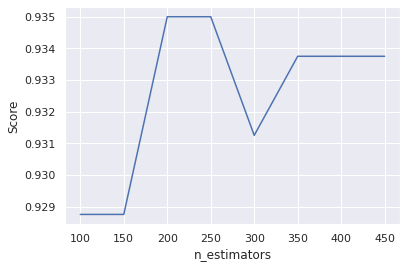

Decision Tree Accuracy: 93.50%


In [61]:
scoreListDT = []
for i in range(100,500,50):
    DTclassifier = RandomForestClassifier(n_estimators=i, random_state=STATE)
    DTclassifier.fit(Xtrain, ytrain)
    scoreListDT.append(DTclassifier.score(Xtest, ytest))

   
plt.plot(range(100,500,50), scoreListDT)
plt.xticks(np.arange(100,500,50))
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

In [56]:
tt = DTclassifier.feature_importances_

In [83]:
DTclassifier = RandomForestClassifier(n_estimators=250, random_state=STATE)
DTclassifier.fit(Xtrain, ytrain)
DTclassifier.score(Xtest, ytest)

/tmp/ipykernel_3112076/4145884728.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  DTclassifier.fit(Xtrain, ytrain)


0.935

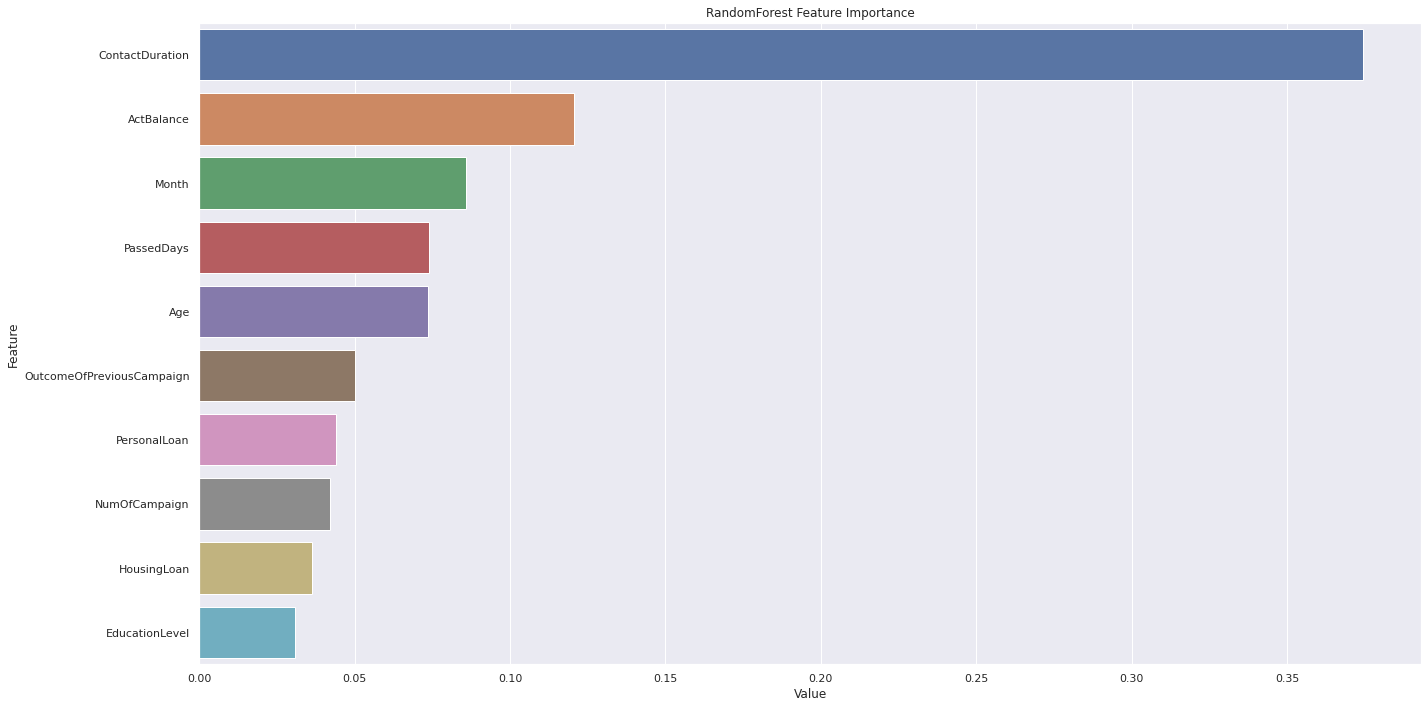

In [162]:
feature_imp = pd.DataFrame(sorted(zip(best_rf.feature_importances_,cols)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).iloc[:10])
plt.title('RandomForest Feature Importance')
plt.tight_layout()
plt.show()
        

## XGBOOST

In [66]:
train_dmatrix = xgb.DMatrix(data=Xtrain, label=ytrain)
test_dmatrix = xgb.DMatrix(data=Xtest, label=ytest)

In [63]:
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [ ]:
objective = 'binary:logistic', eval_metric='auc', booster='gbtree'

In [68]:
gbm_param_grid = {
                  'eta': np.arange(0.1, 1, 0.2),
                  'n_estimators': [100, 200, 300],
                  'max_depth':[4,8,12,16,20],
                  'colsample_bytree': [0.1, 0.3, 0.5, 0.8, 1]}
gbm = xgb.XGBClassifier(booster= 'gbtree', objective='binary:logistic')

randomized_roc_auc = RandomizedSearchCV(estimator=gbm, param_distributions=gbm_param_grid, 
                                        n_iter=5, scoring="roc_auc", cv=5, verbose=1)
randomized_roc_auc.fit(Xtrain, ytrain)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

[22:37:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

[22:40:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

[22:44:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

[22:48:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

[22:52:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

[22:56:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

[22:58:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

[23:01:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

[23:03:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

[23:06:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

[23:08:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

[23:13:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

[23:18:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

[23:23:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

[23:28:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

[23:33:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

[23:35:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

[23:37:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

[23:38:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

[23:40:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

[23:42:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

[23:48:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

[23:53:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

[23:58:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

[00:04:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

[00:09:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster='gbtree',
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constra...
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                    

In [69]:
randomized_roc_auc.best_score_

0.9760146604938271

In [90]:
randomized_roc_auc.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.9000000000000001, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.899999976,
              max_delta_step=0, max_depth=16, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=36,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:
bst = randomized_roc_auc.best_estimator_

In [118]:

bst.fit(Xtrain, ytrain)

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

[18:00:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.9000000000000001, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.899999976,
              max_delta_step=0, max_depth=16, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=36,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [119]:
bst.score(Xtest, ytest)

0.94

In [120]:
xgb_pred = bst.predict(Xtest)

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [121]:
confusion_matrix(ytest, xgb_pred)

array([[364,  36],
       [ 12, 388]])

In [157]:
print(classification_report(ytest, xgb_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       400
           1       0.92      0.97      0.94       400

    accuracy                           0.94       800
   macro avg       0.94      0.94      0.94       800
weighted avg       0.94      0.94      0.94       800



In [123]:
xgbf, xgbt, _ = roc_curve(y_score=xgb_pred, y_true=ytest)
xgbauc = roc_auc_score(xgb_pred, ytest)

In [ ]:
pp = bst.predict(Xtest)
roc_auc_score(pp, ytest)

In [124]:
bst.feature_importances_

array([0.21537703, 0.01487048, 0.07018202, 0.02698974, 0.02393086,
       0.        , 0.0209376 , 0.1053288 , 0.20855255, 0.062821  ,
       0.04272164, 0.06353175, 0.02201097, 0.09754499, 0.02520066],
      dtype=float32)

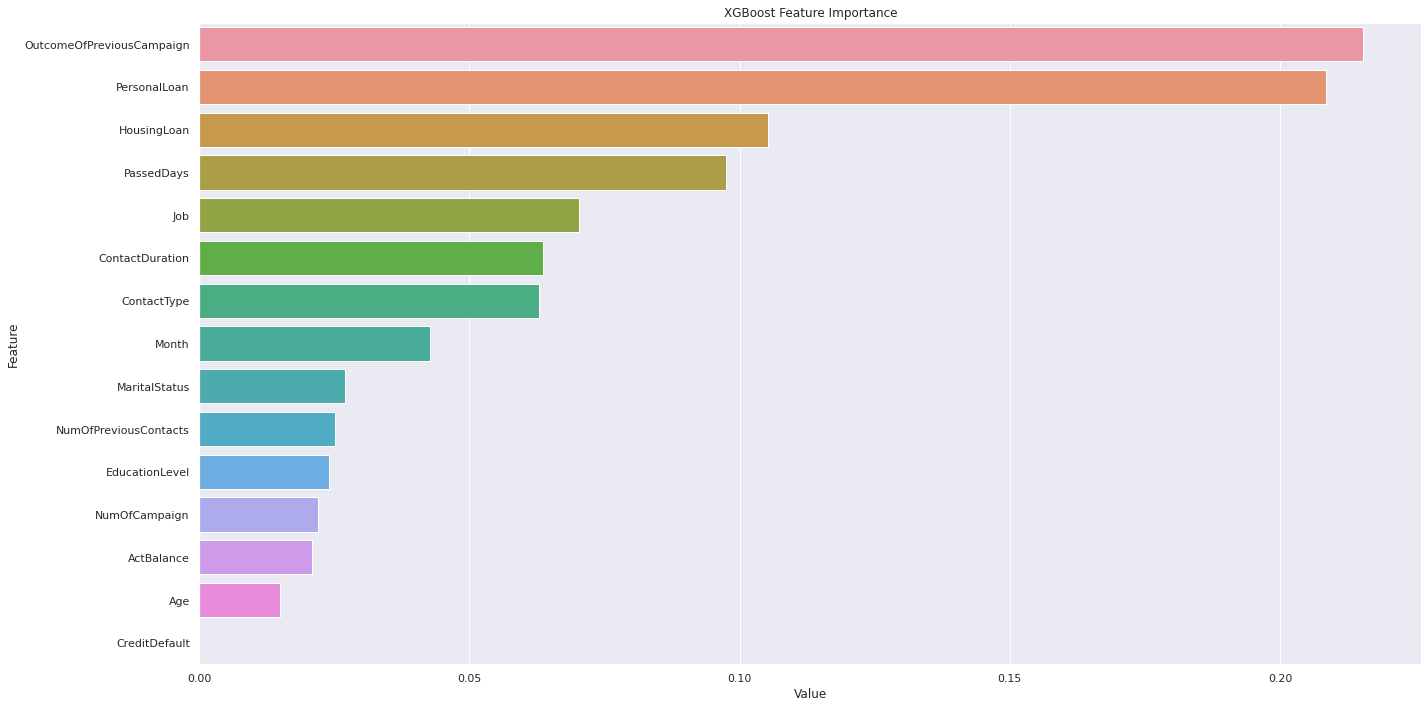

In [153]:
feature_imp = pd.DataFrame(sorted(zip(bst.feature_importances_,cols)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).iloc[:50])
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()
        

In [126]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, silhouette_score
STATE=26

In [127]:
clf = LogisticRegression()
clf.fit(Xtrain, ytrain)
lrpred = clf.predict(Xtest)
clf.score(Xtest, ytest)

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.825

In [128]:
lrf, lrt, _ = roc_curve(y_score=lrpred, y_true=ytest)
lrauc = roc_auc_score(lrpred, ytest)

In [156]:
print(classification_report(ytest, lrpred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       400
           1       0.84      0.81      0.82       400

    accuracy                           0.82       800
   macro avg       0.83      0.82      0.82       800
weighted avg       0.83      0.82      0.82       800



In [129]:
svmc = svm.SVC(kernel='rbf', random_state=STATE)
svmc.fit(Xtrain, ytrain)
svm_pred = svmc.predict(Xtest)
svmc.score(Xtest, ytest)

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.76875

In [130]:
svmf, svmt, _ = roc_curve(y_score=svm_pred, y_true=ytest)
svmauc = roc_auc_score(svm_pred, ytest)

In [158]:
print(classification_report(ytest, svm_pred))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       400
           1       0.80      0.72      0.76       400

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.77       800
weighted avg       0.77      0.77      0.77       800



In [131]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(Xtrain, ytrain)
knn_pred = knn.predict(Xtest)
knn.score(Xtest, ytest)

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.77375

In [132]:
knnf, knnt, _ = roc_curve(y_score=knn_pred, y_true=ytest)
knnauc = roc_auc_score(knn_pred, ytest)

In [159]:
print(classification_report(ytest, knn_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       400
           1       0.76      0.80      0.78       400

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.77       800
weighted avg       0.77      0.77      0.77       800



In [151]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

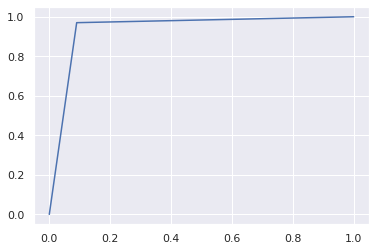

In [145]:
plt.plot(xgbf, xgbt)

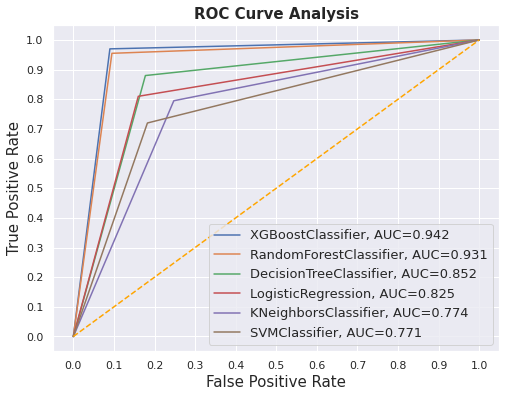

In [152]:
result_table.loc[0] = ["XGBoostClassifier", xgbf, xgbt, xgbauc]
result_table.loc[1] = ["RandomForestClassifier", rff, rft, rfauc]
result_table.loc[2] = ["DecisionTreeClassifier", dtreef, dtreet, dtreeauc]
result_table.loc[3] = ["LogisticRegression", lrf, lrt, lrauc]

result_table.loc[4] = "KNeighborsClassifier", knnf, knnt, knnauc
result_table.loc[5] = ["SVMClassifier", svmf, svmt, svmauc]


result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()


In [141]:
result_table

,classifiers,fpr,tpr,auc
0,KNN,"[0.0, 0.2475, 1.0]","[0.0, 0.795, 1.0]",0.774245
1,SVM,"[0.0, 0.1825, 1.0]","[0.0, 0.72, 1.0]",0.771329
2,LR,"[0.0, 0.16, 1.0]","[0.0, 0.81, 1.0]",0.825293
3,XGB,"[0.0, 0.09, 1.0]","[0.0, 0.97, 1.0]",0.941590
4,RF,"[0.0, 0.095, 1.0]","[0.0, 0.955, 1.0]",0.931078
5,Dtree,"[0.0, 0.1775, 1.0]","[0.0, 0.88, 1.0]",0.852415


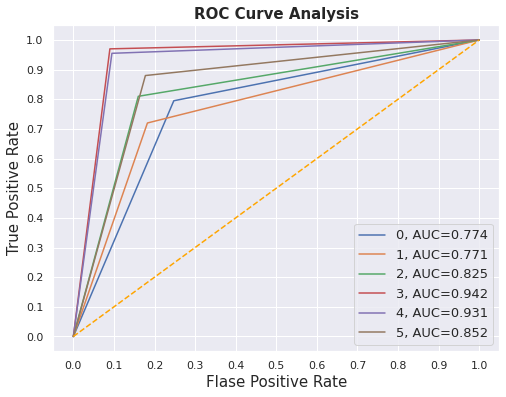

In [142]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()


In [ ]:
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)